# TMDb Movie Dataset Analysis

## About the dataset
TMDb movie dataset is from kaggle. According to kaggle, the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data.
Accroding Kaggle data overview, the dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average. It also contains some basic information corresponding to the movie like cast, director, keywords, runtime, genres, etc. Any of the basic information can be a key to a success movie.
## Questions to be answered during this analysis:
1. Which movie made most and least profit?
2. Which movie had the largest and lowest budget funds?
3. Which movie generated most and least revenue?
4. Shortest and longest runtime?
5. Average runtime, average budget, average revenue, average profit earned by a movie?
6. On average which year had the most number of profitable movies?
7. Which genre is liked/watched by people often?
8. Successful genres (with respest to the profitable movies).
9. Most frequent cast (with respest to the profitable movies)


In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.
df1 = pd.read_csv('tmdb-movies.csv')
df=df1.copy()
df1.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Data Wrangling

### Let's start with general properties of the dataset

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Insights**
1. No unit of currency is mentioned in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.

2. vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count

## Data Cleaning
Following things are to be done:
1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
2. Removing the duplicate values(if any).
3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
4. Changing release date column into date format.
5. Replacing zero with NaN in runtime column.
6. Changing format of budget and revenue column.

**Let's get to it then!**

### We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.

In [6]:
#creating a list of columb to be deleted
col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
df= df.drop(col,1)

#previewing the new dataset
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


### Removing the duplicate values(if any).

In [7]:
df.drop_duplicates(keep ='first', inplace=True)

### Movies with zero budget or zero revenue, needs to be discarded.

In [8]:
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)


### Changing release date column into date format.

In [9]:
df.release_date = pd.to_datetime(df['release_date'])

### Replacing zero with NaN in runtime column.

In [10]:
df['runtime'] =df['runtime'].replace(0, np.NAN)

### Changing format of budget and revenue column.

In [11]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

**Let's look at our final dataframe**

In [12]:
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


## Exploratory Data Analysis

### Calculating profits earned by movies

In [13]:
df['profit_earned']= df['revenue']-df['budget']

### Which movie made most and least profit?

In [14]:
def calculate(col):
    maximum= df[col].idxmax()
    max_details=pd.DataFrame(df.loc[maximum])
    
    minimum= df[col].idxmin()
    min_details=pd.DataFrame(df.loc[minimum])
    info=pd.concat([max_details, min_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


**Answer**- Avatar(highest earned profit i.e 2544505847 ), The Warrior's Way(lowest earned profit i.e -413912431)

### Which movie had the largest and lowest budget funds?

In [15]:
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


**Answer**- The Warrior's way had the maximum amount of budget, whereas Lost & Found had the minimum amount in their budget funds.

### Which movie generated most and least revenue?

In [16]:
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


**Answer**- Avatar generated the maximum amount of revenue, whereas Shattered Glass generated the least amount of revenue.

### Shortest and longest runtime?

In [17]:
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


**Answer**- Carlos had the longest runtime, Kid's Story had the shortest runtime.

### Average runtime, average budget, average revenue, average profit earned by a movie?

In [18]:
def avg_fun(col):
    return df[col].mean()

In [19]:
avg_fun('runtime'), avg_fun('budget'),avg_fun('revenue'),avg_fun('profit_earned')

(109.22029060716139, 37203696.954852104, 107686616.09807992, 70482919.14322782)

**Answer**- 
1. Average runtime- 109 minutes
2. Average Budget- 37203696 dollars
3. Average Revenue- 107686616 dollars
4. Average Profits- 70482919 dollars

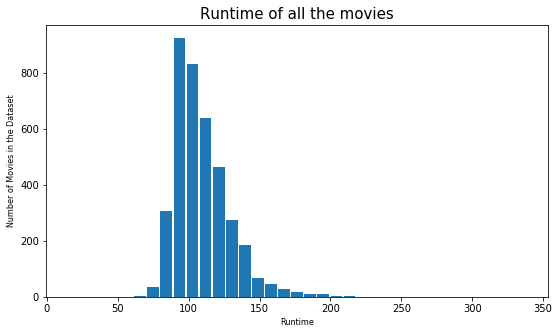

In [20]:
#plotting a histogram of runtime of movies
plt.figure(figsize=(9,5))
plt.xlabel('Runtime', fontsize = 8)
plt.ylabel('Number of Movies in the Dataset', fontsize=8)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(df['runtime'], rwidth = 0.9, bins =35)

plt.show()


**Insights**- The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes.

### Year of release vs. Profits

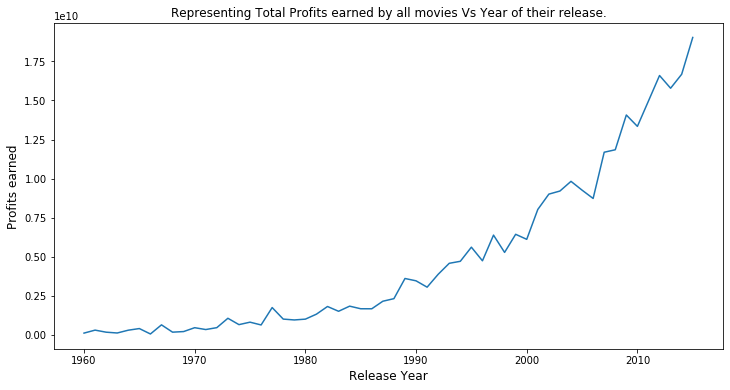

In [21]:
profits_year = df.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize=(12,6))
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Profits earned', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')
plt.plot(profits_year)

plt.show()


### On average which year had the most number of profitable movies?

In [22]:
profits_year.idxmax()

2015

**Answer** So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.

### Let's see more about the profitable movies

Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.

**So lets fix this amount to 50 million dollar.**

In [23]:
#selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1
def data(column):
    data = profit_data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [24]:
count = data('genres')
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

### Which genre is liked/watched by people often?

Some of the rows in the genres column hold a multiple values. To begin using the information in this column effectively, I need to: 
- know how many unique genres labels there are; and
- split these genres out into such a way that they can be considered individually

In [25]:
movie_genres = df1.copy()
movie_genres.drop(['original_title','imdb_id','budget','revenue','homepage','tagline','keywords','overview' ,'cast', 'director', 'runtime', 'release_date', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'], axis=1, inplace=True)
movie_genres.dropna(axis=0, how='any', inplace=True)
genre = movie_genres.loc[:, ['id', 'genres']]
genre.head(5)
genre_list = genre['genres'].str.split('|').tolist()
genre_list[:5]
# loop through each iterable (a nested list) in genre_list
# check that each element is indeed a list
# convert to list if not

for i in range(len(genre_list)):
    if not isinstance(genre_list[i], list):
        genre_list[i] = [genre_list[i]]
        

stacked_genre = pd.DataFrame(genre_list, index=genre['id']).stack()
stacked_genre = stacked_genre.reset_index()
stacked_genre = stacked_genre.loc[:, ['id', 0]]
# rename columns
stacked_genre.columns = ['id', 'genre']
# merge stacked_genre and movie_genres and drop columns we don't need
merged_df = pd.merge(movie_genres, stacked_genre, on='id', how='left')
merged_df.drop(['genres', 'id'], axis=1, inplace=True)
merged_df

,popularity,release_year,genre
0,32.985763,2015,Action
1,32.985763,2015,Adventure
2,32.985763,2015,Science Fiction
3,32.985763,2015,Thriller
4,28.419936,2015,Action
...,...,...,...
26965,0.065141,1966,Mystery
26966,0.065141,1966,Comedy
26967,0.064317,1966,Action
26968,0.064317,1966,Comedy


We can see from the above dataframe that we have broken out the genres against the release year and popularity values. Next I want a view on all of the different genre types in the data and the relative frequencies in which they occur.

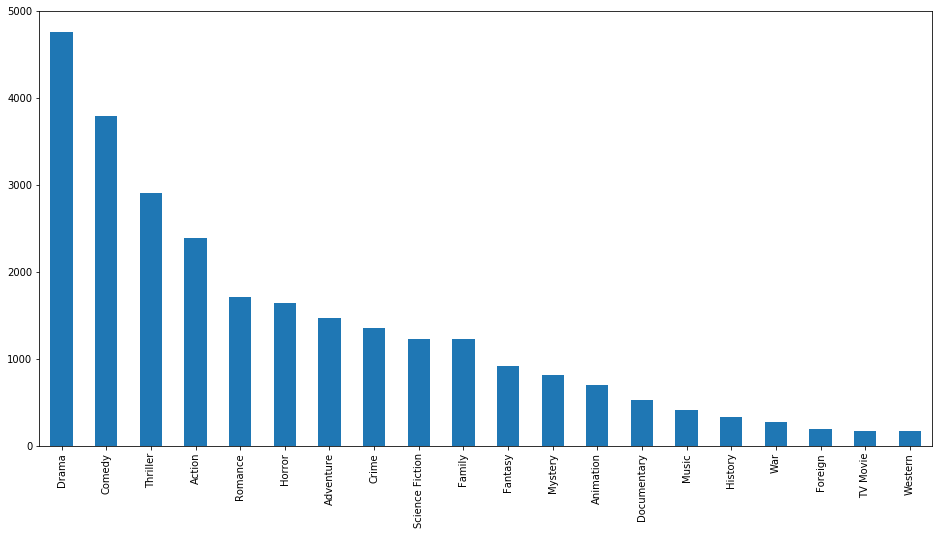

In [26]:
merged_df['genre'].value_counts().plot(kind='bar', figsize=(16, 8));

**Hence from the above plot we can see that drama and comedy are the most common genres. I am curious to see their profitability. Let's find that out.**

### Successful genres (with respest to the profitable movies)

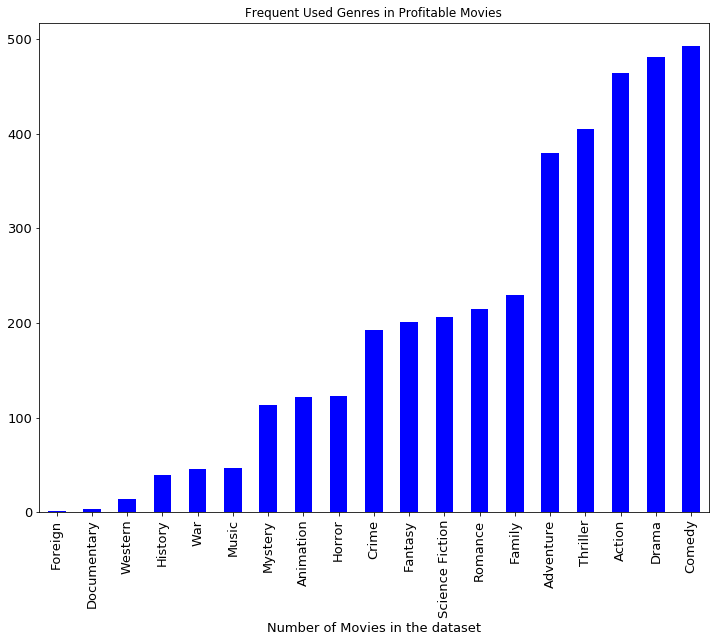

In [27]:
count.sort_values(ascending = True, inplace = True)
lt = count.plot.bar(color = 'blue', fontsize = 13)
lt.set(title = 'Frequent Used Genres in Profitable Movies')
lt.set_xlabel('Number of Movies in the dataset', color = 'black', fontsize = '13')
lt.figure.set_size_inches(12, 9)
plt.show()

**Answer** Comedy, Drama and action are the most profitable genres.

### Most frequent cast (with respest to the profitable movies)

In [28]:
count= data('cast')
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

**Let's also find the budget, revenue and runtimeof these profitable movies.**

In [29]:
def pro_avg(col):
    return profit_data[col].mean()

In [30]:
pro_avg('budget'),pro_avg('revenue'),pro_avg('runtime')

(60444957.76083707, 254957662.59491777, 113.66741405082212)

## Conclusion
I found out some really cool insights from this dataset. Some of them are:
1. Having Tom Cruise, Brad Pitt, Tom Hanks in your cast might result to a successful movie.
2. On average a movie is 109 minutes long.
3. People love watching movies that belong to genre: drama, comedy or action.
4. The Avatar is the most successful movie with profit 2544505847.Whereas The Warrior's Way is the least successful movie with  profit -413912431.
5. Following is the general criteria for a movie to be successful:
    - Average Budget must be around 60 millon dollar
    - Average duration of the movie must be 113 minutes
    - Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
    - Genre must be : Action, Adventure, Thriller, Comedy, Drama.

By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

### Limitation
This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover, we are not sure if the data provided to us is complete, corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDb_Movie_Analysis.ipynb'])

0